<a href="https://colab.research.google.com/github/LittleDarwin2021/face_estimation_GoogleColab/blob/main/faceestimation_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face_estimation for Google Colab

https://google.github.io/mediapipe/

In [1]:
!mkdir "save_imgs"
!mkdir "load_imgs"
!mkdir "save_movie1"
!mkdir "save_movie2"
!mkdir "load_movie"

*   let image files in "load_imgs" 
*   let movie file in "load_movie" 



#mediapipe for face estimation

In [2]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.4 MB/s 


In [11]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [4]:
#to modify aspect ratio
def aspect_normalize(file):
  im = cv2.imread(file)
  as1 = im.shape[0]
  as2 = im.shape[1]
  return as1, as2 

In [5]:
file_list = []
import glob

files = glob.glob("load_imgs/*")
for file in files:
    print(file)
    file_list.append(file)

load_imgs/01FY9OQIOW.jpg
load_imgs/01ABJ2BQ0S.jpg
load_imgs/0108UPBKSC.jpg


In [8]:
imgs_num_list=[]
human_num_list =[]
position_list=[]
x_list=[]
y_list=[]
z_list=[]


# For static images:
IMAGE_FILES = file_list
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    #画像によってアス比が異なるので後に補正する
    as1, as2 = aspect_normalize(file)
    human_num=0
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    blank = np.array(np.zeros(annotated_image.shape))

    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)

      for i in range(len(str(face_landmarks).split('landmark'))):
        cnt=0
        if str(face_landmarks).split('landmark')[i] != "":
          

          
          imgs_num_list.append(idx)
          human_num_list.append(human_num)
          position_list.append(cnt)
          x_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[2])/as1)
          y_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[4])/as2)
          z_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[6]))
          cnt+=1
      human_num +=1

      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('save_imgs/annotated_image' + str(idx).zfill(8) + '.png', blank)

  

In [9]:
df = pd.DataFrame(imgs_num_list,columns=["image_num"])
df["human_num"]=human_num_list
df["position_list"]=position_list
df["x"]= x_list
df["y"]= y_list
df["z"]= z_list

In [12]:
#normlize x,y

x_list = []
y_list = []
z_list = []

for i in range(df["image_num"].max()+1):
  df_ = df[df["image_num"] == i]
  x_ = preprocessing.minmax_scale(df_["x"].values)
  for k in x_:
    x_list.append(k) 
  y_ = preprocessing.minmax_scale(df_["y"].values)
  for j in y_:
    y_list.append(j)
  z_ = preprocessing.minmax_scale(df_["z"].values)
  for p in z_:
    z_list.append(p)

df["x"] = x_list
df["y"] = y_list
df["z"] = z_list

In [13]:
#save　Coordinate
df.to_csv("Coordinate_type1.csv")

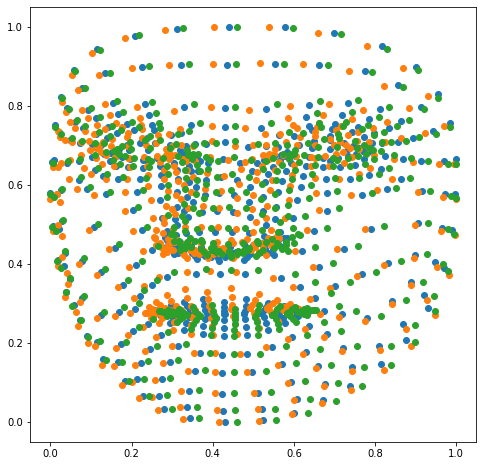

In [22]:
#drawing all faces


plt.figure(figsize=(8,8))
for i, k in enumerate(file_list):
  df_1 = df[df["image_num"] == i]
  plt.scatter(df_1.x, 1-df_1.y)

plt.show();


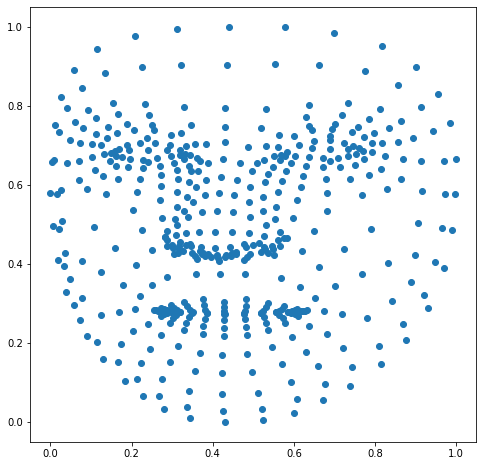

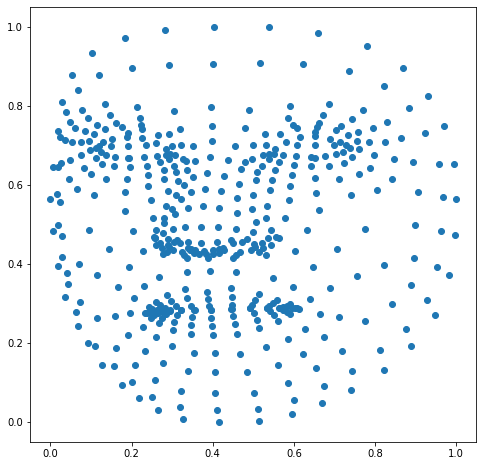

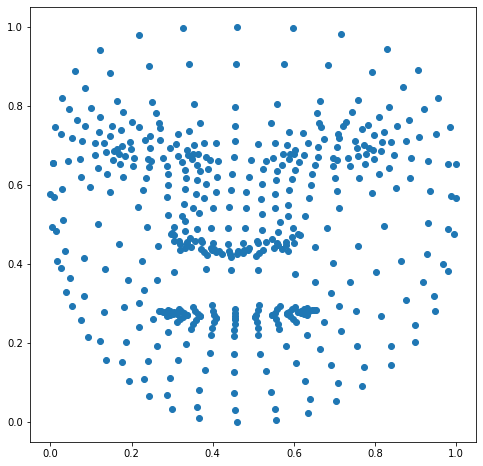

In [21]:
#drawing each faces

for i, k in enumerate(file_list):
  plt.figure(figsize=(8,8))
  df_1 = df[df["image_num"] == i]
  plt.scatter(df_1.x, 1-df_1.y)

  plt.show();

In [23]:
# reshape table for analysis

length = df["image_num"].nunique()

df_X_list = []
df_Y_list = []
df_Z_list = []

for i in range(length):
  df_ = df[df["image_num"] == i]
  
  length2 = df_["image_num"].nunique()
  for k in range(length2):
    df_X_ = df_["x"].T
    df_Y_ = df_["y"].T
    df_Z_ = df_["z"].T

    df_X_list.append(df_X_.values)
    df_Y_list.append(df_Y_.values)
    df_Z_list.append(df_Z_.values)

df_X = pd.DataFrame(df_X_list, columns = [ "X_{}".format(str(i).zfill(3)) for i in range(478)])
df_Y = pd.DataFrame(df_Y_list, columns = [ "Y_{}".format(str(i).zfill(3)) for i in range(478)])
df_Z = pd.DataFrame(df_Z_list, columns = [ "Z_{}".format(str(i).zfill(3)) for i in range(478)])


In [24]:
# center alignment (fix nose_top on 0.5)
gap_list = df_X["X_001"] -0.5
X_list_rivise = []
for i, k in enumerate(df_X.values):
  a = k - gap_list[i]
  X_list_rivise.append(a)
df_X2 = pd.DataFrame(X_list_rivise, columns = [ "X_{}".format(str(i).zfill(3)) for i in range(478)])

gap_list = df_Y["Y_001"] -0.5
Y_list_rivise = []
for i, k in enumerate(df_Y.values):
  a = k - gap_list[i]
  Y_list_rivise.append(a)
df_Y2 = pd.DataFrame(Y_list_rivise, columns = [ "Y_{}".format(str(i).zfill(3)) for i in range(478)])

In [25]:
df_XY = pd.concat([df_X2, df_Y2], axis = 1)

In [28]:
#save　Coordinate
df_XY.to_csv("Coordinate_type2.csv")

For movie

In [29]:
#select movie file 
video= "load_movie/sample.mov"

In [30]:
cap = cv2.VideoCapture(video)

#if not cap.isOpened():
    #pass

base_path = os.path.join("save_movie1", "sample_video_img")

digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))
n = 0

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(10), "png"), frame)
        n += 1
    else:
        break


In [31]:
file_list = []
import glob

files = glob.glob("save_movie1/*")
for file in files:
    #print(file)
    file_list.append(file)
    file_list.sort()

In [46]:
imgs_num_list=[]
human_num_list =[]
position_list=[]
x_list=[]
y_list=[]
z_list=[]


# For static images:
IMAGE_FILES = file_list
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    #画像によってアス比が異なるので後に補正する
    as1, as2 = aspect_normalize(file)
    human_num=0
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    blank = np.array(np.zeros(annotated_image.shape))

    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)

      for i in range(len(str(face_landmarks).split('landmark'))):
        cnt=0
        if str(face_landmarks).split('landmark')[i] != "":
          
          
          imgs_num_list.append(idx)
          human_num_list.append(human_num)
          position_list.append(cnt)
          x_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[2])/as1)
          y_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[4])/as2)
          z_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[6]))
          cnt+=1
      human_num +=1

      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('save_movie2/annotated_image' + str(idx).zfill(8) + '.png', blank)

In [47]:
df = pd.DataFrame(imgs_num_list,columns=["image_num"])
df["human_num"]=human_num_list
df["position_list"]=position_list
df["x"]= x_list
df["y"]= y_list
df["z"]= z_list

In [48]:
#normlize x,y

x_list = []
y_list = []
z_list = []

for i in range(df["image_num"].max()+1):
  df_ = df[df["image_num"] == i]
  x_ = preprocessing.minmax_scale(df_["x"].values)
  for k in x_:
    x_list.append(k) 
  y_ = preprocessing.minmax_scale(df_["y"].values)
  for j in y_:
    y_list.append(j)
  z_ = preprocessing.minmax_scale(df_["z"].values)
  for p in z_:
    z_list.append(p)

df["x"] = x_list
df["y"] = y_list
df["z"] = z_list

In [49]:
#save　Coordinate
df.to_csv("Coordinate_movie_type1.csv")

In [51]:
# reshape table for analysis

length = df["image_num"].nunique()

df_X_list = []
df_Y_list = []
df_Z_list = []

for i in range(length):
  df_ = df[df["image_num"] == i]
  
  length2 = df_["image_num"].nunique()
  for k in range(length2):
    df_X_ = df_["x"].T
    df_Y_ = df_["y"].T
    df_Z_ = df_["z"].T

    df_X_list.append(df_X_.values)
    df_Y_list.append(df_Y_.values)
    df_Z_list.append(df_Z_.values)

df_X = pd.DataFrame(df_X_list, columns = [ "X_{}".format(str(i).zfill(3)) for i in range(478)])
df_Y = pd.DataFrame(df_Y_list, columns = [ "Y_{}".format(str(i).zfill(3)) for i in range(478)])
df_Z = pd.DataFrame(df_Z_list, columns = [ "Z_{}".format(str(i).zfill(3)) for i in range(478)])

In [52]:
# center alignment (fix nose_top on 0.5)
gap_list = df_X["X_001"] -0.5
X_list_rivise = []
for i, k in enumerate(df_X.values):
  a = k - gap_list[i]
  X_list_rivise.append(a)
df_X2 = pd.DataFrame(X_list_rivise, columns = [ "X_{}".format(str(i).zfill(3)) for i in range(478)])

gap_list = df_Y["Y_001"] -0.5
Y_list_rivise = []
for i, k in enumerate(df_Y.values):
  a = k - gap_list[i]
  Y_list_rivise.append(a)
df_Y2 = pd.DataFrame(Y_list_rivise, columns = [ "Y_{}".format(str(i).zfill(3)) for i in range(478)])

In [53]:
df_XY = pd.concat([df_X2, df_Y2], axis = 1)

In [54]:
#save　Coordinate
df_XY.to_csv("Coordinate_movie_type2.csv")

animation

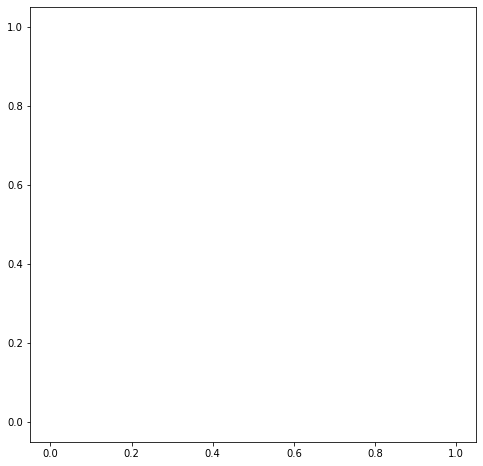

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


fig = plt.figure(figsize=(8,8)) # edit depending on aspect ratio

ims = []

for i in range(df["image_num"].max()):
    df_0 = df[df["image_num"]== i] 
    x = df_0["x"].values
    y = df_0["y"].values
    im = plt.scatter(x, 1-y, color='blue')
    ims.append([im]) 


ani = animation.ArtistAnimation(fig, ims, interval=30, repeat_delay=1000) #edit interval as FPS
ani.save("sample2.gif" , writer="pillow")

plt.show();
